In [1]:
import pandas as pd
import numpy as np



# Loading the data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Exploratory Data Analysis (EDA)

In [3]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
df.shape #shape of dataset



pd.set_option("display.float", "{:.2f}".format)
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:

df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [10]:
print(" actegorical val ",categorical_val)
print("continous val ",continous_val)

 actegorical val  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous val  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Data processing

In [11]:

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
#dataset.head()

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
print(df.columns)

print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [14]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])


# Applying Decision tree algo

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
train_score_1={}

f1_train1={}
precision_train1={}
recall_train1={}
test_score_1={}
f1_test1={}
precision_test1={}
recall_test1={}
def print_score(algo_name,clf, X_train, y_train, X_test, y_test, train=True):
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        train_score_1["Training score "+algo_name]=accuracy_score(y_train, pred) * 100
        f1_train1[algo_name+" training f1 score "]=f1_score(y_train, pred) * 100
        precision_train1[algo_name+" training precision score"]=precision_score(y_train, pred) * 100
        recall_train1[algo_name+" training recall score"]= recall_score(y_train, pred) * 100
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        test_score_1["Testing score"+algo_name]=accuracy_score(y_test, pred) * 100
        f1_test1[algo_name+" testing f1 score"]=f1_score(y_test, pred) * 100
        precision_test1[algo_name+" testing precision score"]=precision_score(y_test, pred) * 100
        recall_test1[algo_name+" testing recall score"]= recall_score(y_test, pred) * 100
    #return f1_train , precision_train ,recall_train,f1_test,precision_test,recall_test

In [16]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import  SelectKBest ,chi2
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X,y)


/home/adnan/anaconda3/envs/adnan_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

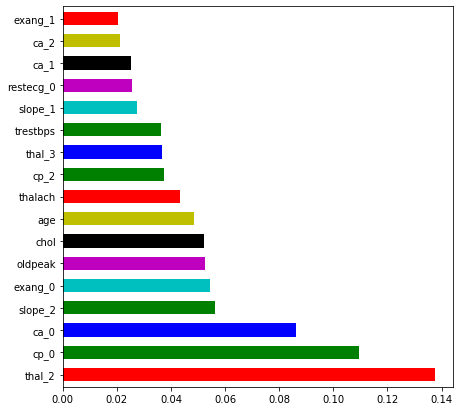

In [18]:
plt.figure(figsize=(7,7))
feat_imp=pd.Series(extra.feature_importances_,index=X.columns)
feat_imp.nlargest(17).plot(kind='barh',color=['r','g','b','g','c','m','k','y'],width=0.6 );
plt.savefig("largestfeatureimp.jpg")

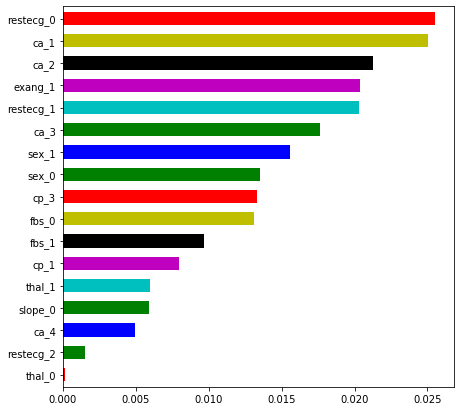

In [19]:
plt.figure(figsize=(7,7))
feat_imp=pd.Series(extra.feature_importances_,index=X.columns)
feat_imp.nsmallest(17).plot(kind='barh',color=['r','g','b','g','c','m','k','y'],width=0.6 );
plt.savefig("smallestfeatureimp.jpg")

# =======HYPERPARAMETER TUNING ON ALGOS===========

# Decision tree hyper parameter tuning

In [20]:
from sklearn. tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }


tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)


#Verbose is a general programming term for produce lots of logging output.
#You can think of it as asking the program to "tell me everything about what you are doing all the time".
#Just set it to true and see what happens.

#iid : boolean, default=True

#    If True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total loss per sample, and not the mean loss across the folds.



#n_jobs : int, default=1

#    Number of jobs to run in parallel.

In [21]:
#grid_search_cv.fit(X_train, y_train)

In [22]:
#grid_search_cv.best_estimator_ 

In [23]:
#grid_search_cv.best_score_
#grid_search_cv.best_params_


In [24]:

"""
best_estimator_ : estimator

    Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.

best_score_ : float

    Score of best_estimator on the left out data.

best_params_ : dict

    Parameter setting that gave the best results on the hold out data.

scorer_ : function

    Scorer function used on the held out data to choose the best parameters for the model.")
"""

'\nbest_estimator_ : estimator\n\n    Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.\n\nbest_score_ : float\n\n    Score of best_estimator on the left out data.\n\nbest_params_ : dict\n\n    Parameter setting that gave the best results on the hold out data.\n\nscorer_ : function\n\n    Scorer function used on the held out data to choose the best parameters for the model.")\n'

In [25]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')

In [26]:
tree.fit(X_train, y_train)


print_score("Decision tree",tree,X_train, y_train, X_test, y_test, train=True)
print_score("Decision tree",tree, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 85.85%
_______________________________________________
Classification Report:	Precision Score: 85.12%
			Recall Score: 89.57%
			F1 score: 87.29%
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [ 12 103]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 87.50%
			Recall Score: 84.00%
			F1 score: 85.71%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 8 42]]



# logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
"""
params1 = {"solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 
           
          "C":(list(range(1, 100)))  ,
           "multi_class":("auto", "ovr")
          }
"""
log_reg = LogisticRegression(random_state=42,solver="liblinear")

#grid_search_cv = GridSearchCV(log_reg, params1, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

#grid_search_cv.fit(X_train, y_train)


log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#grid_search_cv.best_estimator_ 



In [29]:
log_reg = LogisticRegression(C=1,solver="newton-cg")
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=True)
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [31]:
from sklearn import svm

In [32]:
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [33]:
svm1 = svm.SVC(kernel='linear') 
#svmrn=RandomizedSearchCV(svm1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);


In [34]:
#svmrn.fit(X_train, y_train)

In [35]:
#svmrn.best_estimator_

In [36]:
svm1=svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svm1.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=True)
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.91%
_______________________________________________
Classification Report:	Precision Score: 84.30%
			Recall Score: 88.70%
			F1 score: 86.44%
_______________________________________________
Confusion Matrix: 
 [[ 78  19]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [39]:
f1_test1

{'Decision tree testing f1 score': 85.71428571428572,
 'Logistic regression testing f1 score': 87.37864077669903,
 'SVM testing f1 score': 88.0}

# KNN algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

    
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 84.43%
_______________________________________________
Classification Report:	Precision Score: 82.54%
			Recall Score: 90.43%
			F1 score: 86.31%
_______________________________________________
Confusion Matrix: 
 [[ 75  22]
 [ 11 104]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
Classification Report:	Precision Score: 87.04%
			Recall Score: 94.00%
			F1 score: 90.38%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 3 47]]



# Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

"""
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier()

grid_search_cv2 = GridSearchCV(rand_forest, random_grid, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

"""
"""
    n_estimators = number of trees in the foreset
    
    max_features = max number of features considered for splitting a node
    
    max_depth = max number of levels in each decision tree
    
    min_samples_split = min number of data points placed in a node before the node is split
    
    min_samples_leaf = min number of data points allowed in a leaf node
    
    bootstrap = method for sampling data points (with or without replacement)

"""

'\n    n_estimators = number of trees in the foreset\n    \n    max_features = max number of features considered for splitting a node\n    \n    max_depth = max number of levels in each decision tree\n    \n    min_samples_split = min number of data points placed in a node before the node is split\n    \n    min_samples_leaf = min number of data points allowed in a leaf node\n    \n    bootstrap = method for sampling data points (with or without replacement)\n\n'

In [42]:
#grid_search_cv2.fit(X_train, y_train)

In [43]:
#grid_search_cv2.best_params_
#rand_forest.fit(X_train, y_train)

rand_forest = RandomForestClassifier(bootstrap= True,max_depth= 10, min_samples_split= 5, n_estimators= 200)



In [44]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.58%
_______________________________________________
Classification Report:	Precision Score: 98.28%
			Recall Score: 99.13%
			F1 score: 98.70%
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  1 114]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [46]:
#grid_search_cv2.best_estimator_ 

In [47]:
import matplotlib.pyplot as plt

# Xgboost

In [48]:
params={
    "learning_rate" :  [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [49]:
from xgboost import XGBClassifier 

In [50]:
xgboost1 = XGBClassifier()
xgboost1=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
xgboost1.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid=True, n_iter=5, n_jobs=-1,
                   param_distributi

In [51]:
xgboost1.best_estimator_



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
xgboost1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [53]:
xgboost1.fit(X_train, y_train);

In [54]:
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=True)
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.57%
_______________________________________________
Classification Report:	Precision Score: 90.60%
			Recall Score: 92.17%
			F1 score: 91.38%
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [  9 106]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



# Voting classifier

In [55]:
from sklearn.ensemble import  VotingClassifier

In [56]:
voting_clif = VotingClassifier(estimators=[
    ('tree',tree),('lr',log_reg),('knn',knn_classifier),('rf',rand_forest)], 
                               voting='hard')

In [57]:
voting_clif.fit(X_train,y_train)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='random')),
     

In [58]:
for clf in (tree,log_reg,knn_classifier,rand_forest,voting_clif):
    voting_clif.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

In [59]:
print_score("Voting Classifier", voting_clif,X_train, y_train, X_test, y_test, train=True)
print_score("Voting Classifier",voting_clif, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.68%
_______________________________________________
Classification Report:	Precision Score: 89.57%
			Recall Score: 89.57%
			F1 score: 89.57%
_______________________________________________
Confusion Matrix: 
 [[ 85  12]
 [ 12 103]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 84.31%
			Recall Score: 86.00%
			F1 score: 85.15%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 7 43]]



# whole accuracy

below are returned scores from print_scores() fucntion

In [60]:
#test_scores=[test_score1,test_score2,test_score3,test_score4,test_score5]


algos_names=["Decision\ntree", "Logistic\nregression","SVM", "KNN", "Random\nforest","xgboost", "Voting\nClassifier"]
train_score_=list(train_score_1.values())
test_score_=list(test_score_1.values())
f1_test=list(f1_test1.values())
precision_test=list(precision_test1.values())
recall_test=list(recall_test1.values())
f1_train=list(f1_train1.values())
precision_train=list(precision_train1.values())
recall_train=list(recall_train1.values())




In [61]:
test_score5 = accuracy_score(y_test, voting_clif.predict(X_test)) *100
train_score5 = accuracy_score(y_train, voting_clif.predict(X_train)) *100

results_df = pd.DataFrame(data=[["Random forest",test_score_[4],f1_test[4],precision_test[4],recall_test[4]],
                                ["KNN",test_score_[3],f1_test[3],precision_test[3],recall_test[3]],
                                ["Decision tree",train_score_[0],f1_test[0],precision_test[0],recall_test[0]],
                                ["Logistic Regression", test_score_[1],f1_test[1],precision_test[1],recall_test[1]],
                                ["SVM", test_score_[2],f1_test[2],precision_test[2],recall_test[2]],
                                ["xgboost",test_score_[5],f1_test[5],precision_test[5],recall_test[5]],
                                
                                ["Voting classfier",test_score_[6],f1_test[6],precision_test[6],precision_test[6],recall_test[6]]
                               ], 
                          columns=['Model', 'Testing Accuracy %'
                                  ,'f1 test %','Precision test %','Recall test %','nan'])
results_df=results_df.drop(['nan'],axis=1) # i was getting some nan column , so dropped it



pd.options.display.float_format ='{:.2f}'.format
results_df.to_csv("results/trainresults.csv") 

results_df

,Model,Testing Accuracy %,f1 test %,Precision test %,Recall test %
0,Random forest,84.62,86.27,84.62,88.00
1,KNN,89.01,90.38,87.04,94.00
2,Decision tree,85.85,85.71,87.50,84.00
3,Logistic Regression,85.71,87.38,84.91,90.00
4,SVM,86.81,88.00,88.00,88.00
5,xgboost,83.52,84.85,85.71,84.00
6,Voting classfier,83.52,85.15,84.31,84.31


In [62]:
test_score_1

{'Testing scoreDecision tree': 84.61538461538461,
 'Testing scoreLogistic regression': 85.71428571428571,
 'Testing scoreSVM': 86.81318681318682,
 'Testing scoreKNN': 89.01098901098901,
 'Testing scoreRandom forest': 84.61538461538461,
 'Testing scorexgboost': 83.51648351648352,
 'Testing scoreVoting Classifier': 83.51648351648352}

# Training Plots

In [63]:
"""
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Training Accuracy  plot of algrothims",fontweight="bold")

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Accuracy",fontweight="bold")
plt.bar(algos_names,train_score_
                 ,color=['r','b','g','y','m']);

plt.subplot(2,2,2)


plt.title(" f1 train score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,f1_train,color=['r','b','g','y','m']);


plt.subplot(2,2,3)

plt.title(" Precision train score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,precision_train,color=['r','b','g','y','m']);



plt.subplot(2,2,4)

plt.title(" recall train score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,recall_train,color=['r','b','g','y','m']);
"""

'\nplt.figure(figsize=(15,15))\nplt.subplot(2,2,1)\nplt.title("Training Accuracy  plot of algrothims",fontweight="bold")\n\nplt.xlabel("Algorithms ",fontweight="bold")\nplt.ylabel("Accuracy",fontweight="bold")\nplt.bar(algos_names,train_score_\n                 ,color=[\'r\',\'b\',\'g\',\'y\',\'m\']);\n\nplt.subplot(2,2,2)\n\n\nplt.title(" f1 train score plot of algrothims",fontweight="bold")\n\n\nplt.xlabel("Algorithms ",fontweight="bold")\nplt.ylabel("Score",fontweight="bold")\n\nplt.bar(algos_names,f1_train,color=[\'r\',\'b\',\'g\',\'y\',\'m\']);\n\n\nplt.subplot(2,2,3)\n\nplt.title(" Precision train score plot of algrothims",fontweight="bold")\n\n\nplt.xlabel("Algorithms ",fontweight="bold")\nplt.ylabel("Score",fontweight="bold")\n\nplt.bar(algos_names,precision_train,color=[\'r\',\'b\',\'g\',\'y\',\'m\']);\n\n\n\nplt.subplot(2,2,4)\n\nplt.title(" recall train score plot of algrothims",fontweight="bold")\n\n\nplt.xlabel("Algorithms ",fontweight="bold")\nplt.ylabel("Score",fontweigh

# Test plots

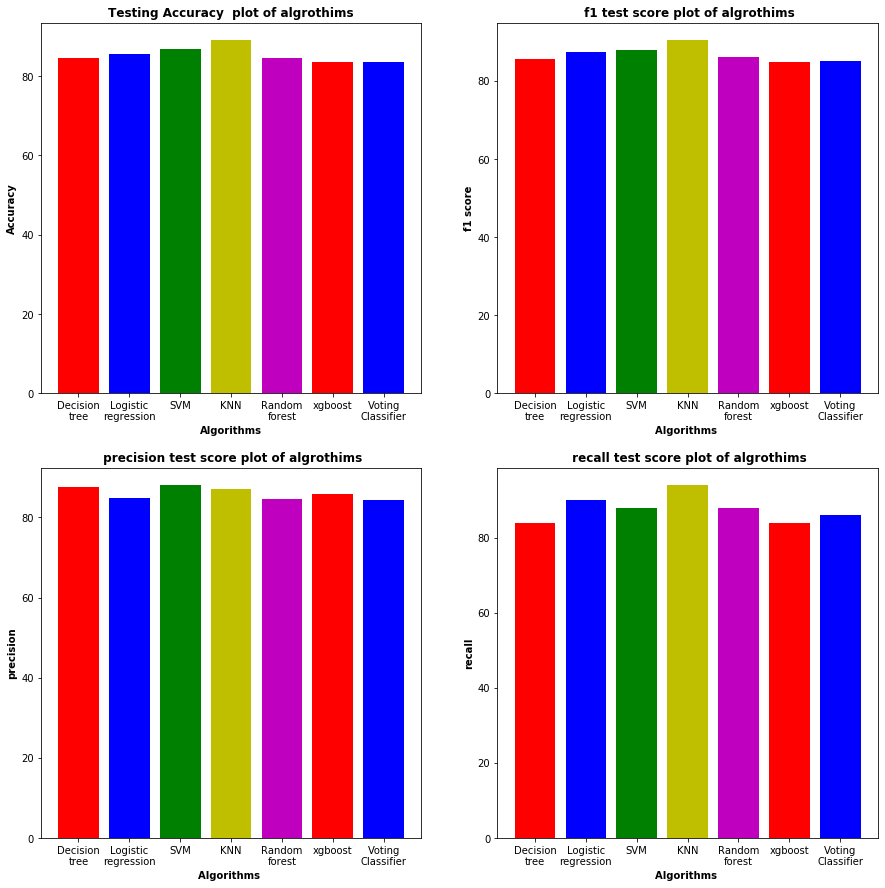

In [138]:

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Testing Accuracy  plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms",fontweight="bold")
plt.ylabel("Accuracy",fontweight="bold")

plt.bar(algos_names,test_score_,color=['r','b','g','y','m']);



plt.subplot(2,2,2)
plt.title(" f1 test score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("f1 score",fontweight="bold")

plt.bar(algos_names,f1_test,color=['r','b','g','y','m']);



plt.subplot(2,2,3)
plt.title(" precision test score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("precision",fontweight="bold")

plt.bar(algos_names,precision_test,color=['r','b','g','y','m']);
plt.savefig("testsublot.jpg")

plt.subplot(2,2,4)
plt.title(" recall test score plot of algrothims",fontweight="bold")


plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("recall",fontweight="bold")

plt.bar(algos_names,recall_test,color=['r','b','g','y','m']);

In [143]:
imp=rand_forest.feature_importances_
imp

array([0.05435532, 0.04866663, 0.04190446, 0.07917429, 0.08375566,
       0.0236156 , 0.01324291, 0.08454986, 0.00689271, 0.02484133,
       0.01032636, 0.00772414, 0.00789602, 0.01027109, 0.01052253,
       0.00115389, 0.05133518, 0.04473983, 0.003111  , 0.02240995,
       0.03710177, 0.11336701, 0.02374263, 0.01518141, 0.01387615,
       0.0001458 , 0.0002428 , 0.00349334, 0.08636721, 0.07599312])

In [144]:
for i,v in enumerate(imp):
    print('feature ',i,'Score',v)

feature  0 Score 0.05435532323750201
feature  1 Score 0.048666632422882106
feature  2 Score 0.041904464365378626
feature  3 Score 0.07917429052764596
feature  4 Score 0.08375566266229387
feature  5 Score 0.023615598983048304
feature  6 Score 0.013242908662065025
feature  7 Score 0.08454986050876981
feature  8 Score 0.006892710600730419
feature  9 Score 0.024841326822763136
feature  10 Score 0.010326363999291124
feature  11 Score 0.007724144908351241
feature  12 Score 0.007896020805378268
feature  13 Score 0.010271088767527517
feature  14 Score 0.010522526094595709
feature  15 Score 0.0011538901807654608
feature  16 Score 0.05133517972036007
feature  17 Score 0.04473983462459282
feature  18 Score 0.0031109978634849453
feature  19 Score 0.022409948918076378
feature  20 Score 0.03710177116213378
feature  21 Score 0.11336700610423814
feature  22 Score 0.023742627133177045
feature  23 Score 0.015181406096319726
feature  24 Score 0.013876145322136383
feature  25 Score 0.0001457983497821549
f

In [145]:
feature_dict={}
for feature , imp in zip(df.columns,imp):
    feature_dict[feature]=imp

In [148]:
feature_dict

{'age': 0.05435532323750201,
 'sex': 0.048666632422882106,
 'cp': 0.041904464365378626,
 'trestbps': 0.07917429052764596,
 'chol': 0.08375566266229387,
 'fbs': 0.023615598983048304,
 'restecg': 0.013242908662065025,
 'thalach': 0.08454986050876981,
 'exang': 0.006892710600730419,
 'oldpeak': 0.024841326822763136,
 'slope': 0.010326363999291124,
 'ca': 0.007724144908351241,
 'thal': 0.007896020805378268,
 'target': 0.010271088767527517}

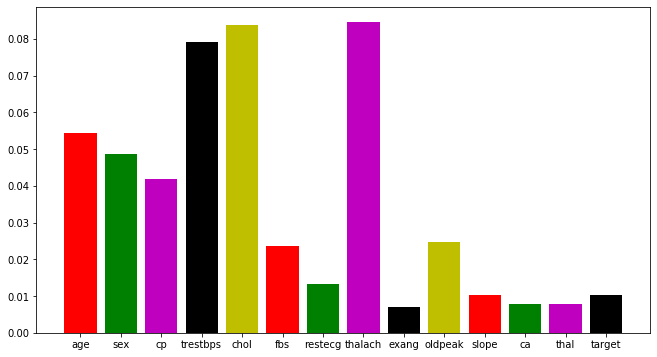

In [162]:
plt.figure(figsize=(11,6))
plt.bar(feature_dict.keys(),feature_dict.values(),color=['r','g','m','k','y']);
plt.savefig("fetureimp.jpg")